In [1]:
import pandas as pd
import numpy as np
import  matplotlib.pyplot as plt
%matplotlib inline
from sklearn import preprocessing

In [9]:
data = pd.read_csv('June.csv')

In [10]:
features=data[['ITEM_PRICE','ITEM_SALES_VOLUME','Label1','Label2','Label3','Label4','Label5']]
labels = data[['label']]
#名字单独保存，以备后患
feature_list=list(features.columns)
#转换成合适的格式
features=np.array(features)

In [11]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import load_wine

In [12]:
#数据集切分
from sklearn.model_selection import train_test_split
train_features,test_features,train_labels,test_labels=train_test_split(features,labels,test_size=0.1,random_state=42)
print('训练集特征',train_features.shape)
print('训练集标签',train_labels.shape)
print('测试集特征',test_features.shape)
print('测试集标签',test_labels.shape)

训练集特征 (265652, 7)
训练集标签 (265652, 1)
测试集特征 (29517, 7)
测试集标签 (29517, 1)


In [13]:
from sklearn.model_selection import train_test_split
clf = DecisionTreeClassifier(random_state=0)
rfc = RandomForestClassifier(random_state=0)
clf = clf.fit(train_features,train_labels)
rfc = rfc.fit(train_features,train_labels)
score_c = clf.score(test_features,test_labels)
score_r = rfc.score(test_features,test_labels)
print("Single Tree:{}".format(score_c)
     ,"Random Forest:{}".format(score_r)
     )

<ipython-input-13-aa23ba1daf2f>:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc = rfc.fit(train_features,train_labels)


Single Tree:0.9991530304570247 Random Forest:0.9994240607107768


In [14]:
#得到特征重要性
importances=list(rfc.feature_importances_)
# print(importances)
#转换格式
feature_importances=[(feature,round(importance,2)) for feature,importance in zip(feature_list,importances)]
#排序
feature_importances=sorted(feature_importances,key=lambda x:x[1],reverse=True)
#对应进行打印
[print('Variable:{:20} Importance:{}'.format(*pair)) for pair in feature_importances]

Variable:ITEM_PRICE           Importance:0.47
Variable:ITEM_SALES_VOLUME    Importance:0.41
Variable:Label3               Importance:0.04
Variable:Label2               Importance:0.03
Variable:Label4               Importance:0.03
Variable:Label1               Importance:0.02
Variable:Label5               Importance:0.01


[None, None, None, None, None, None, None]

Text(0.5, 1.0, 'Variable Importance')

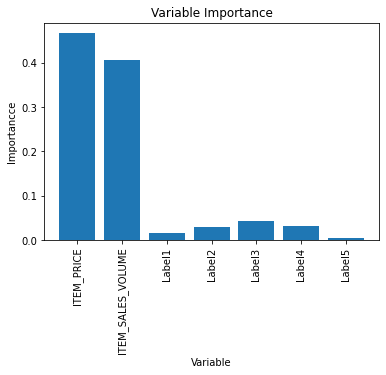

In [15]:
#转换成list格式
x_values=list(range(len(importances)))
#绘图
plt.bar(x_values,importances,orientation='vertical')
#x轴名字
plt.xticks(x_values,feature_list,rotation='vertical')
#图题
plt.xlabel('Variable')
plt.ylabel('Importancce')
plt.title('Variable Importance')

Text(0.5, 1.0, 'Cumulative Importances')

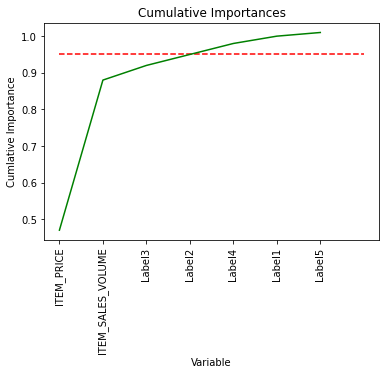

In [14]:
#对特征进行排序
sorted_importances=[importance[1] for importance in feature_importances]
sorted_features=[importance[0] for importance in feature_importances]
#累计重要性
cumulative_importances=np.cumsum(sorted_importances)
#绘制折线图
plt.plot(x_values,cumulative_importances,'g-')
#画一条y=0.95的红线
plt.hlines(y=0.95,xmin=0,xmax=len(sorted_importances),color='r',linestyles='dashed')
#x轴
plt.xticks(x_values,sorted_features,rotation='vertical')
#y轴
plt.xlabel('Variable')
plt.ylabel('Cumlative Importance')
plt.title('Cumulative Importances')

In [51]:
data1 = pd.read_csv('June2.csv')
data2 = pd.read_csv('July2.csv')
data3 = pd.read_csv('August2.csv')
data4 = pd.read_csv('September2.csv')
df=[data1,data2,data3,data4]
result=pd.concat(df)
result.to_csv('result.csv')

In [32]:
data=pd.read_csv('June1.csv')
features=data[['ITEM_PRICE','ITEM_SALES_VOLUME','Label1','Label2','Label3','Label4','Label5']]



In [33]:
predictions=rfc.predict(features)

In [34]:
data['label']=predictions

In [35]:
data.to_csv('June2.csv')

In [42]:
data.iloc[0,1]

9

In [49]:
data=pd.read_csv('September2.csv')

In [50]:
data=data[['ITEM_ID','label']]
data.to_csv('September2.csv')

In [43]:
index=data['label']!=7
data=data[index]
for i in range(data.shape[0]):
    if(data.iloc[i,1]==8):
        data.iloc[i,1]='价格异常'
    else:
        data.iloc[i,1]='销量异常'
data.to_csv('June2.csv')


In [2]:
data1 = pd.read_csv('June1.csv')
data2 = pd.read_csv('July1.csv')
data3 = pd.read_csv('August1.csv')
data4 = pd.read_csv('September1.csv')

In [3]:
df1=data1[data1['label']==7].shape[0]
df2=data1[data1['label']==8].shape[0]
df3=data1[data1['label']==9].shape[0]

<ipython-input-55-9142c407807b>:4: MatplotlibDeprecationWarning: normalize=None does not normalize if the sum is less than 1 but this behavior is deprecated since 3.3 until two minor releases later. After the deprecation period the default value will be normalize=True. To prevent normalization pass normalize=False 
  plt.pie([df1,df2,df3],explode=i,labels=['normal','price unnormal','amount unnormal'], colors=['lightskyblue', 'lightcoral','yellow'],autopct='%1.2f%%',shadow=False,startangle=150)


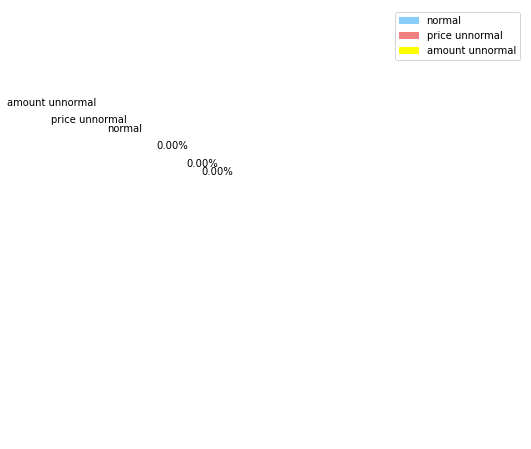

In [55]:
fig = plt.figure(figsize=(8,8))
# x_value=list(range(2))
i = [0,0.1,0.3]
plt.pie([df1,df2,df3],explode=i,labels=['normal','price unnormal','amount unnormal'], colors=['lightskyblue', 'lightcoral','yellow'],autopct='%1.2f%%',shadow=False,startangle=150)
plt.legend()
# plt.bar(x_value,height=[df1,df2], width=0.4, alpha=0.8, color='skyblue')
# plt.xticks(x_value,['正常','异常'],rotation='vertical')
# plt.xlabel('Variable')
# plt.ylabel('数量')
# plt.title('6月数据异常情况数量对比')